In [ ]:
#For a CSV file
import pandas as pd
from google.colab import drive
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/Datasets/'

In [ ]:
#Load the Dataset (Using Numpy)
df = np.genfromtxt(path + 'WineQT.csv', delimiter = ',')
x = df[1:, :11]
y = df[1:, 11]
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.2  ,  0.6  ,  0.08 , ...,  3.45 ,  0.58 , 10.5  ],
       [ 5.9  ,  0.55 ,  0.1  , ...,  3.52 ,  0.76 , 11.2  ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ]])

In [ ]:
#Load the Dataset (Using Pandas)
df = pd.read_csv(path + 'WineQT.csv')
x = df.values[:, :11]
y = df.values[:, 11]
labels = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
n_samples, n_features = x.shape

In [ ]:
#Split the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 69)

In [ ]:
#Scaling the Data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Converting arrays to torch tensors
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))

In [ ]:
#Logistic Regression Model
input = n_features
model = nn.Linear(input, 1)

#Loss Calculator and Optimizer
learning_rate = 0.0001
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

In [ ]:
#Training Loop
n_epochs = 1000
for i in range(n_epochs):
  #Forward Propagation
  y_pred = model(x_train)

  #Backward Propagation
  loss = loss_fn(y_pred, y_train)
  loss.backward()

  #Updating the Weights
  optimizer.step()
  optimizer.zero_grad()

  #Printing data
  if (i+1) % 100 == 0:
    print(f'Epoch: {i+1}, Loss = {loss.item():.4f}')

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([914])) that is different to the input size (torch.Size([914, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 100, Loss = 23.2795
Epoch: 200, Loss = 15.7146
Epoch: 300, Loss = 10.6830
Epoch: 400, Loss = 7.3358
Epoch: 500, Loss = 5.1088
Epoch: 600, Loss = 3.6269
Epoch: 700, Loss = 2.6407
Epoch: 800, Loss = 1.9842
Epoch: 900, Loss = 1.5471
Epoch: 1000, Loss = 1.2560


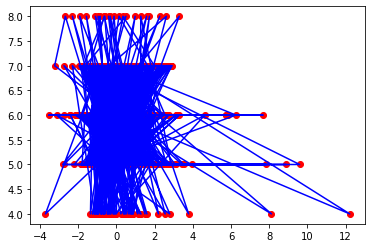

In [ ]:
#Testing accuracy
x_test = torch.from_numpy(x_test.astype(np.float32) )
y_pred = model(x_test)
y_pred = y_pred.detach().numpy()
x_test = x_test.detach().numpy()
plt.plot(x_test, y_test, 'ro')
plt.plot(x_test, y_test, 'b')
plt.show()

